# Taller 1

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#imagnes a trabajas
blur_link="./sim_data-master/images/taller/blur.tif"
house_link="./sim_data-master/images/taller/house.tif"
nouse_link="./sim_data-master/images/taller/noise1.tif"
race_link="./sim_data-master/images/taller/race.tif"
#leer imagenes
blur=cv2.imread(blur_link, cv2.IMREAD_GRAYSCALE)
house=cv2.imread(house_link, cv2.IMREAD_GRAYSCALE)
noise=cv2.imread(nouse_link, cv2.IMREAD_GRAYSCALE)
race=cv2.imread(race_link, cv2.IMREAD_GRAYSCALE)


## 1.	Subir el brillo en una imagen en escala de grises y mostrar el histograma. Explicar.

In [20]:
def show_img_brillos(imagen, intencidad, title):
    plt.figure(figsize=(15, 10))  # Tamaño de la imagen

    plt.subplot(3, 2, 1)
    plt.imshow(imagen, cmap="gray")
    plt.axis("off")
    plt.title('Imagen Original')

    plt.subplot(3, 2, 2)
    histg = cv2.calcHist([imagen], [0], None, [256], [0, 256])
    plt.plot(histg)
    plt.title('Histograma sin Brillo')

    # Crear la imagen con brillo aumentado
    imagen_brillo = imagen + intencidad

    # Mostrar la imagen con brillo aumentado
    plt.subplot(3, 2, 3)
    plt.imshow(imagen_brillo, cmap="gray")
    plt.axis("off")
    plt.title('Imagen con Brillo ')

    # Calcular y mostrar el histograma de la imagen con brillo aumentado
    histg_brillo = cv2.calcHist([imagen_brillo], [0], None, [256], [0, 256])
    plt.subplot(3, 2, 4)
    plt.plot(histg_brillo)
    plt.title('Histograma con Brillo')

    

    # Mostrar la imagen con brillo aumentado con uint8
    imagen_brillo_uint8 = np.clip(imagen + intencidad, 0, 255).astype(np.uint8)
    histg_brillo__uint8 = cv2.calcHist([imagen_brillo], [0], None, [256], [0, 256])
    plt.subplot(3, 2, 5)
    plt.imshow(imagen_brillo_uint8, cmap="gray")
    plt.axis("off")
    plt.title('Imagen con Brillo uint8')

    # Calcular y mostrar el histograma de la imagen con brillo aumentado con uint8
    plt.subplot(3, 2, 6)
    plt.plot(histg_brillo__uint8)
    plt.title('Histograma con Brillo uint8')



    plt.suptitle(title)
    plt.show()



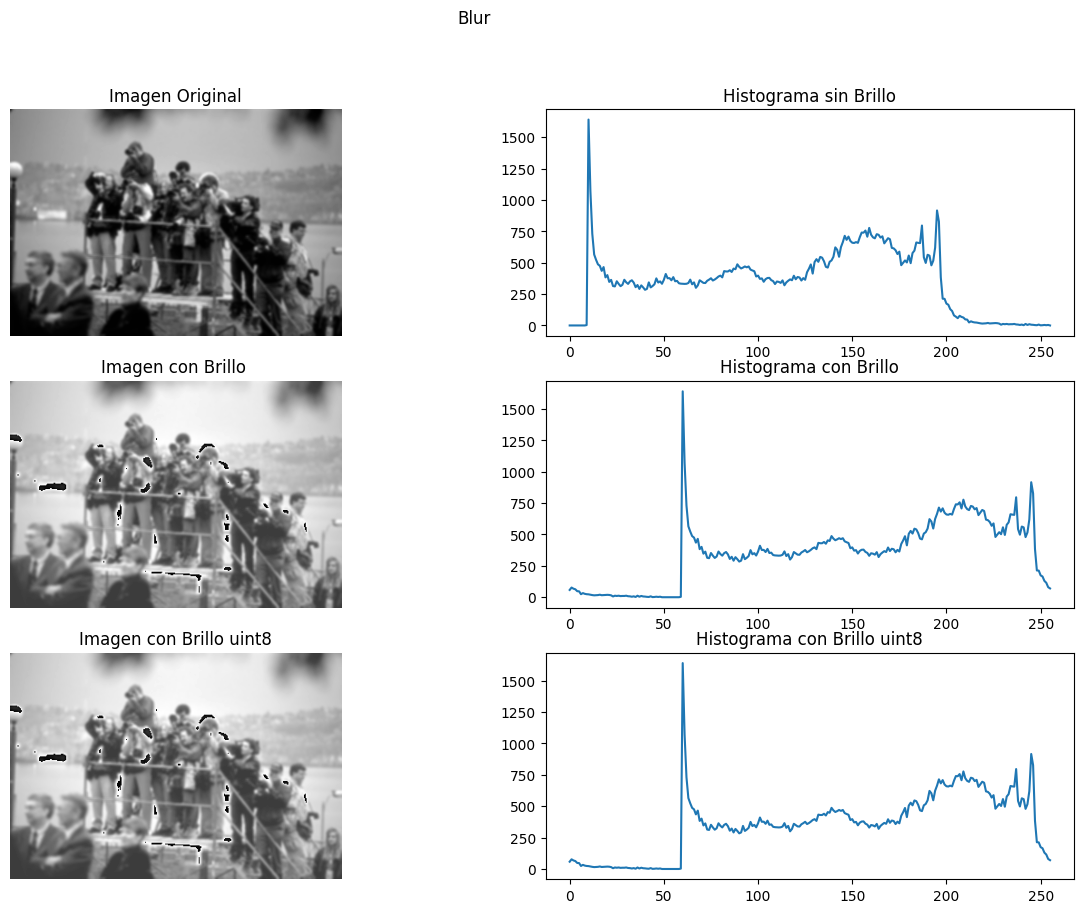

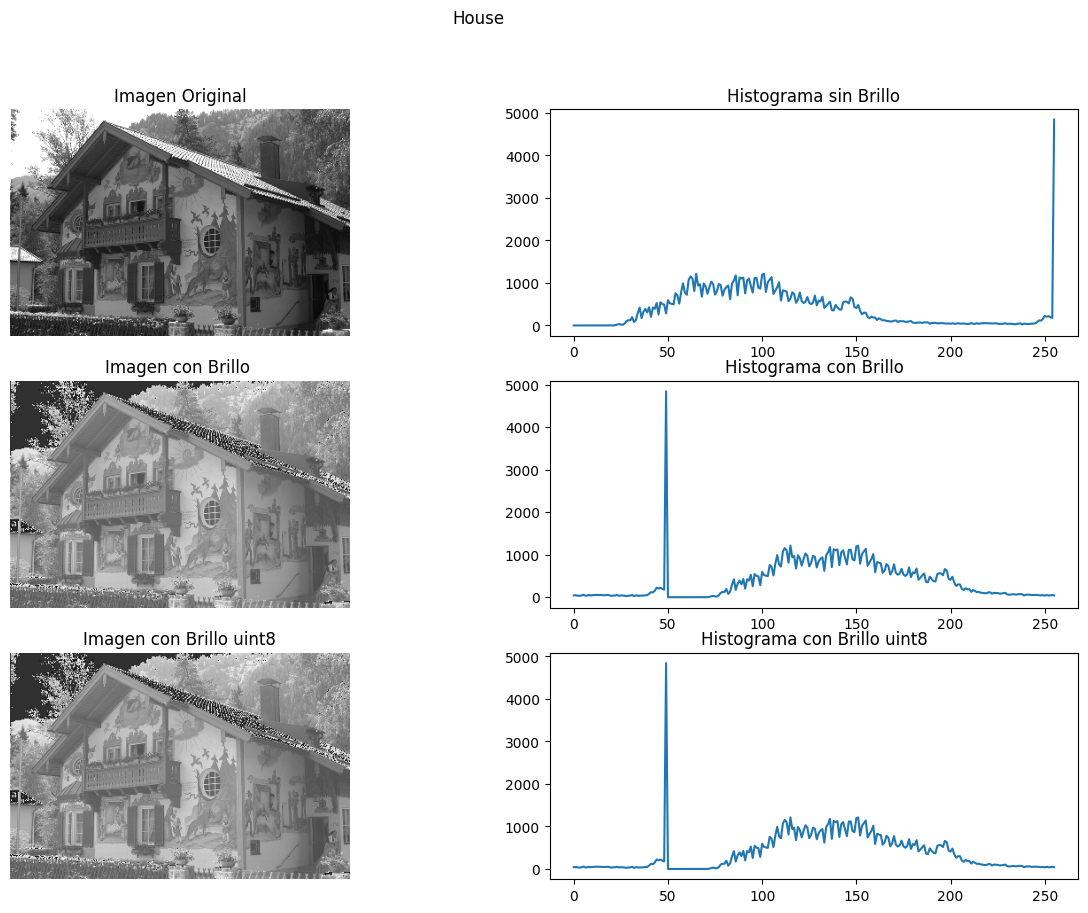

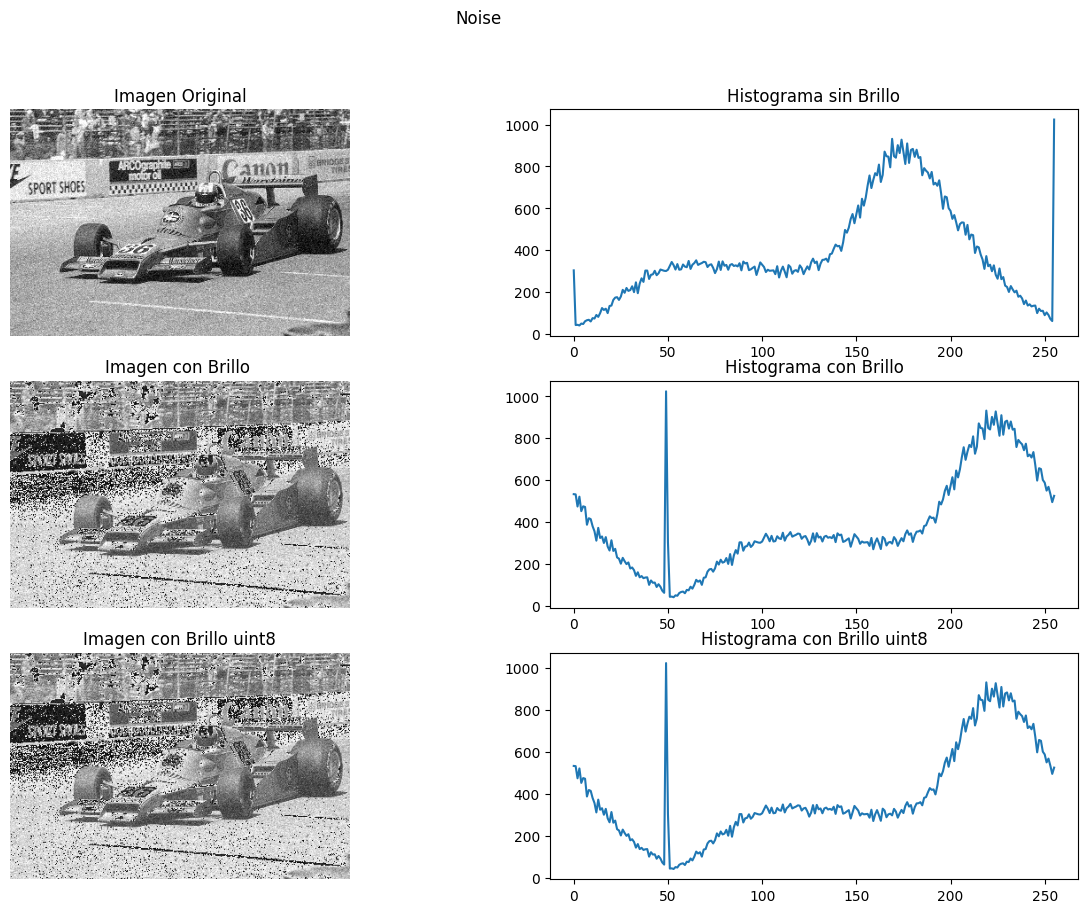

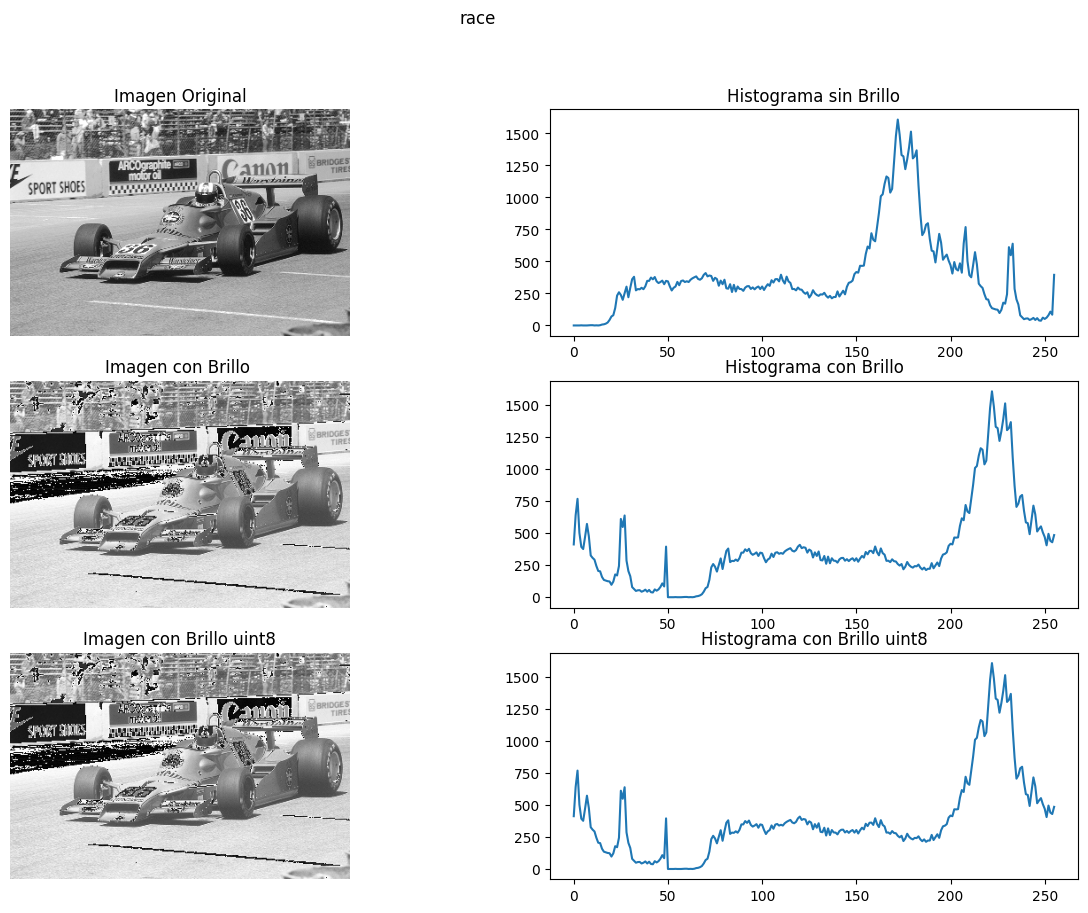

In [21]:
show_img_brillos(blur,50,"Blur")
show_img_brillos(house,50,"House")
show_img_brillos(noise,50,"Noise")
show_img_brillos(race,50,"race")

## 2.	Bajar el brillo en una imagen en escala de grises y mostrar el histograma.Explicar.


In [4]:
def show_img_oscura(imagen, intencidad, title):
    plt.figure(figsize=(10, 8))  # Tamaño de la imagen

    plt.subplot(2, 2, 1)
    plt.imshow(imagen, cmap="gray")
    plt.axis("off")
    plt.title('Imagen Original')

    plt.subplot(2, 2, 2)
    histg = cv2.calcHist([imagen], [0], None, [256], [0, 256])
    plt.plot(histg)
    plt.title('Histograma sin Brillo')

    # Crear la imagen con brillo aumentado
    imagen_brillo = imagen - intencidad

    # Mostrar la imagen con brillo aumentado
    plt.subplot(2, 2, 3)
    plt.imshow(imagen_brillo, cmap="gray")
    plt.axis("off")
    plt.title('Imagen con Brillo Aumentado')

    # Calcular y mostrar el histograma de la imagen con brillo aumentado
    histg_brillo = cv2.calcHist([imagen_brillo], [0], None, [256], [0, 256])
    plt.subplot(2, 2, 4)
    plt.plot(histg_brillo)
    plt.title('Histograma con Brillo')

    plt.suptitle(title)
    plt.show()


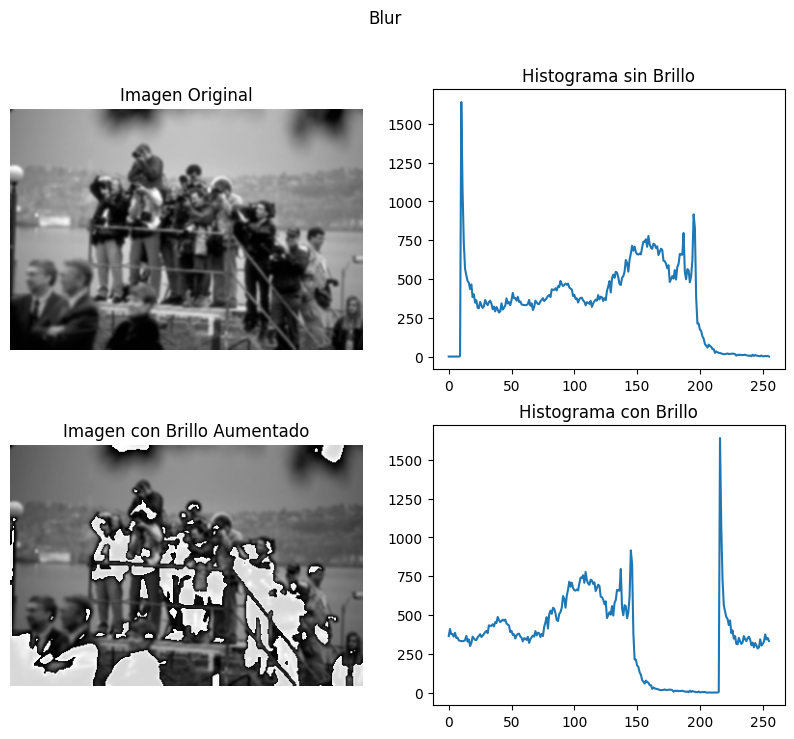

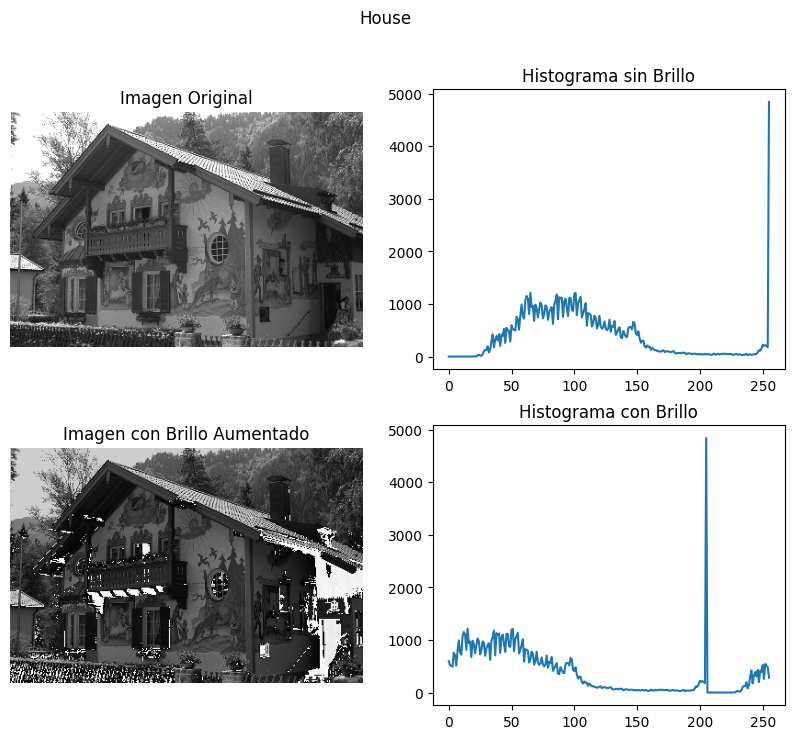

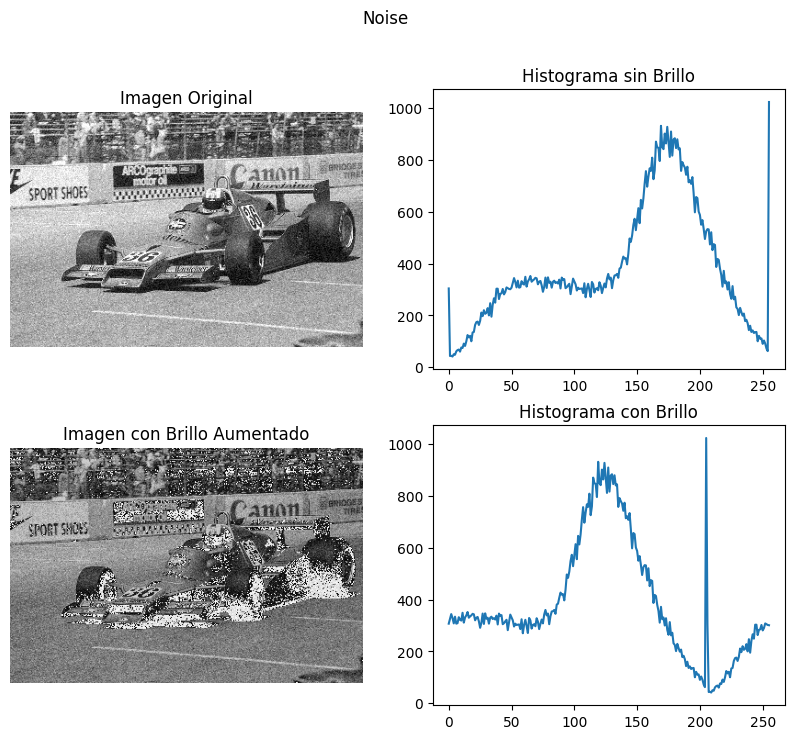

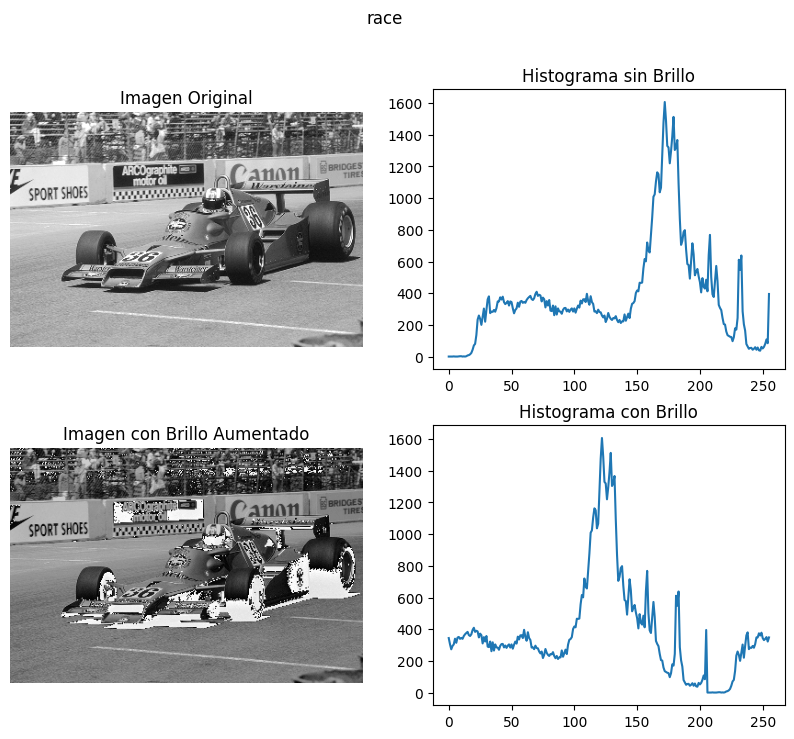

In [5]:
show_img_oscura(blur,50,"Blur")
show_img_oscura(house,50,"House")
show_img_oscura(noise,50,"Noise")
show_img_oscura(race,50,"race")


## 3.	Repetir puntos 1 y 2 para una imagen de color (usar histograma de cada canal en RGB).

In [28]:
def modificar_brillo_por_Canal(imagen, intencidad):
    blue, green, red = cv2.split(imagen)
    blue_brillo_uint8 = np.clip(blue + intencidad, 0, 255).astype(np.uint8)
    green_brillo_uint8 = np.clip(green + intencidad, 0, 255).astype(np.uint8)
    red_brillo_uint8 = np.clip(red + intencidad, 0, 255).astype(np.uint8)
    return blue_brillo_uint8, green_brillo_uint8, red_brillo_uint8
    

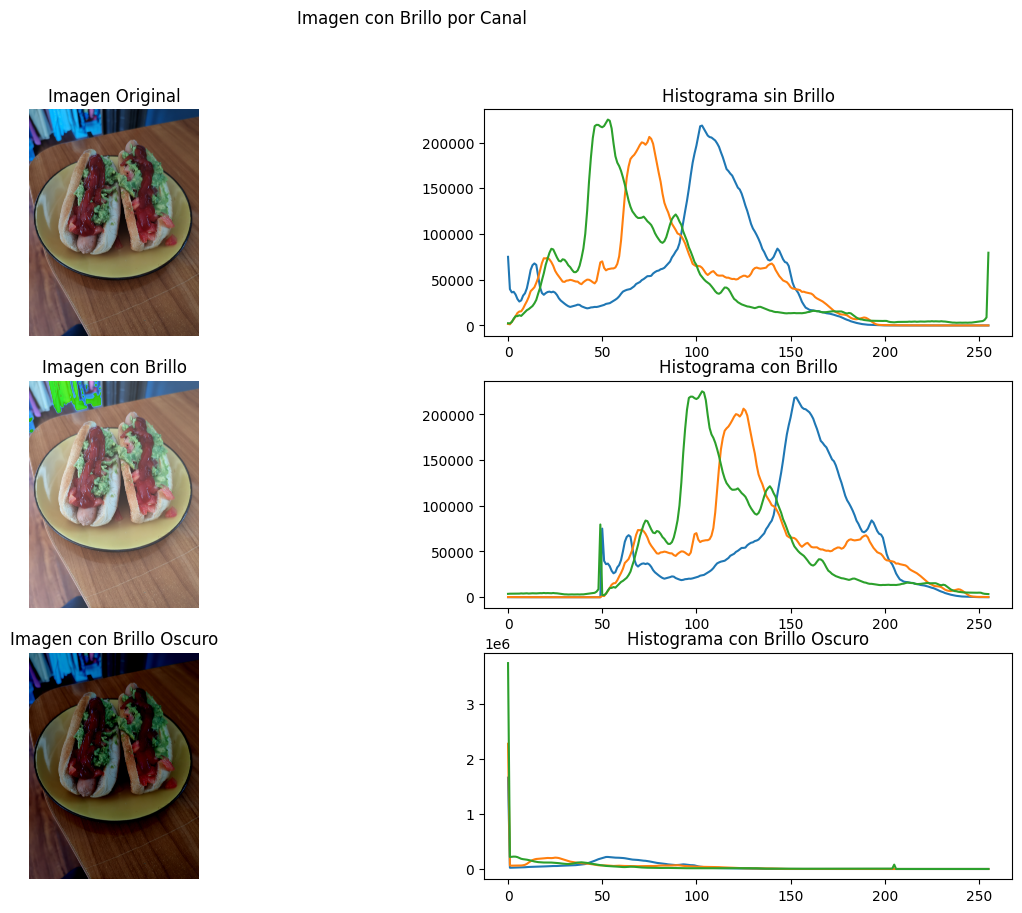

In [31]:
img = cv2.imread("./sim_data-master/images/taller/CompletoSupremo.jpg")
blue, green, red = cv2.split(img)
blue_brillo, green_brillo, red_brillo = modificar_brillo_por_Canal(img, 50)
blue_oscuro, green_oscuro, red_oscuro = modificar_brillo_por_Canal(img, -50)


hist_blue=cv2.calcHist([blue], [0], None, [256], [0, 256])
hist_green=cv2.calcHist([green], [0], None, [256], [0, 256])
hist_red=cv2.calcHist([red], [0], None, [256], [0, 256])

hist_blue_brillo=cv2.calcHist([blue_brillo], [0], None, [256], [0, 256])
hist_green_brillo=cv2.calcHist([green_brillo], [0], None, [256], [0, 256])
hist_red_brillo=cv2.calcHist([red_brillo], [0], None, [256], [0, 256])

hist_blue_oscuro=cv2.calcHist([blue_oscuro], [0], None, [256], [0, 256])
hist_green_oscuro=cv2.calcHist([green_oscuro], [0], None, [256], [0, 256])
hist_red_oscuro=cv2.calcHist([red_oscuro], [0], None, [256], [0, 256])

plt.figure(figsize=(15, 10))  # Tamaño de la imagen

plt.subplot(3, 2, 1)
plt.imshow(cv2.merge([red, green, blue]))
plt.axis("off")
plt.title('Imagen Original')

plt.subplot(3, 2, 2)
plt.plot(hist_red)
plt.plot(hist_green)
plt.plot(hist_blue)
plt.title('Histograma sin Brillo')

plt.subplot(3, 2, 3)
plt.imshow(cv2.merge([red_brillo, green_brillo, blue_brillo]))
plt.axis("off")
plt.title('Imagen con Brillo')

plt.subplot(3, 2, 4)
plt.plot(hist_red_brillo)
plt.plot(hist_green_brillo)
plt.plot(hist_blue_brillo)
plt.title('Histograma con Brillo')

plt.subplot(3, 2, 5)
plt.imshow(cv2.merge([red_oscuro, green_oscuro, blue_oscuro]))
plt.axis("off")
plt.title('Imagen con Brillo Oscuro')

plt.subplot(3, 2, 6)
plt.plot(hist_red_oscuro)
plt.plot(hist_green_oscuro)
plt.plot(hist_blue_oscuro)
plt.title('Histograma con Brillo Oscuro')

plt.suptitle("Imagen con Brillo por Canal")
plt.show()








## 4.	Subir el contraste en una imagen y mostrar el histograma. Explicar.
- Referencia : https://docs.opencv.org/4.x/d3/dc1/tutorial_basic_linear_transform.html

In [34]:
def show_img_Contraste(imagen, alpha, title):
    plt.figure(figsize=(15, 10))  # Tamaño de la imagen
    plt.subplot(3, 2, 1)
    plt.imshow(imagen, cmap="gray")
    plt.axis("off")
    plt.title('Imagen Original')

    plt.subplot(3, 2, 2)
    histg = cv2.calcHist([imagen], [0], None, [256], [0, 256])
    plt.plot(histg)
    plt.title('Histograma sin Brillo')

    imagen_modificada = cv2.convertScaleAbs(imagen, alpha=alpha, beta=0)

    # Mostrar la imagen con brillo aumentado
    plt.subplot(3, 2, 3)
    plt.imshow(imagen_modificada, cmap="gray")
    plt.axis("off")
    plt.title('Imagen con Contraste ')

    # Calcular y mostrar el histograma de la imagen con brillo aumentado
    histg_modificada = cv2.calcHist([imagen_modificada], [0], None, [256], [0, 256])
    plt.subplot(3, 2, 4)
    plt.plot(histg_modificada)
    plt.title('Histograma con Contraste')


    plt.suptitle(title)
    plt.show()







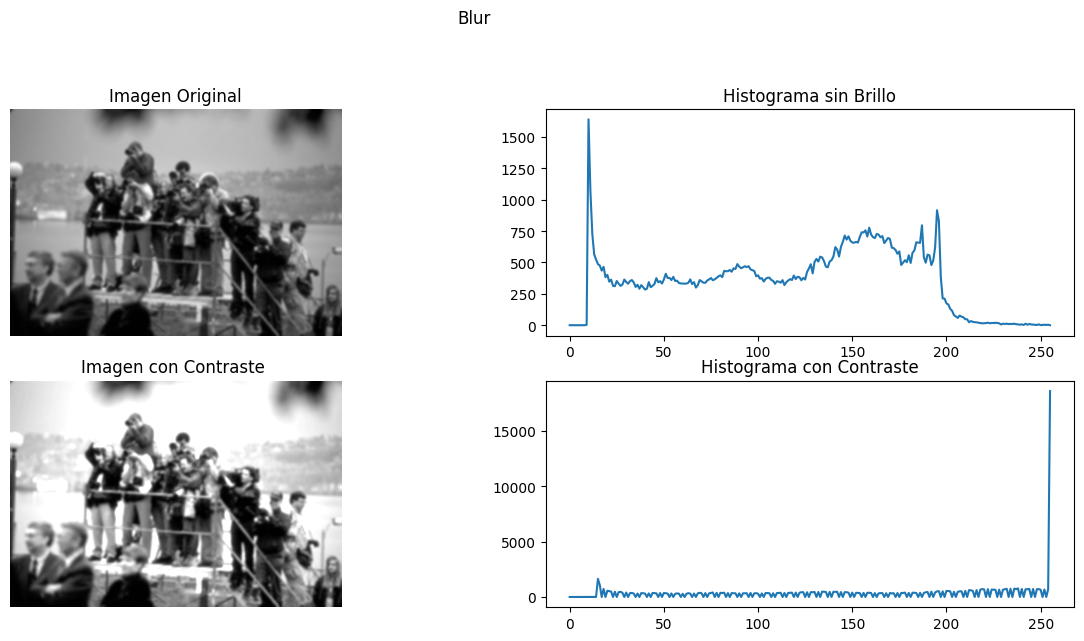

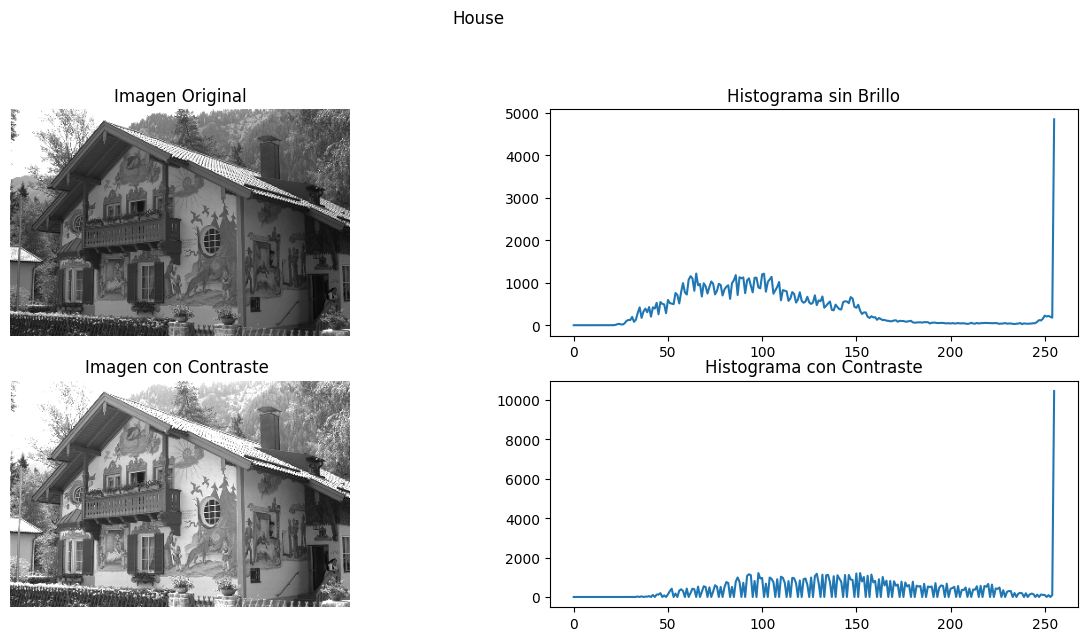

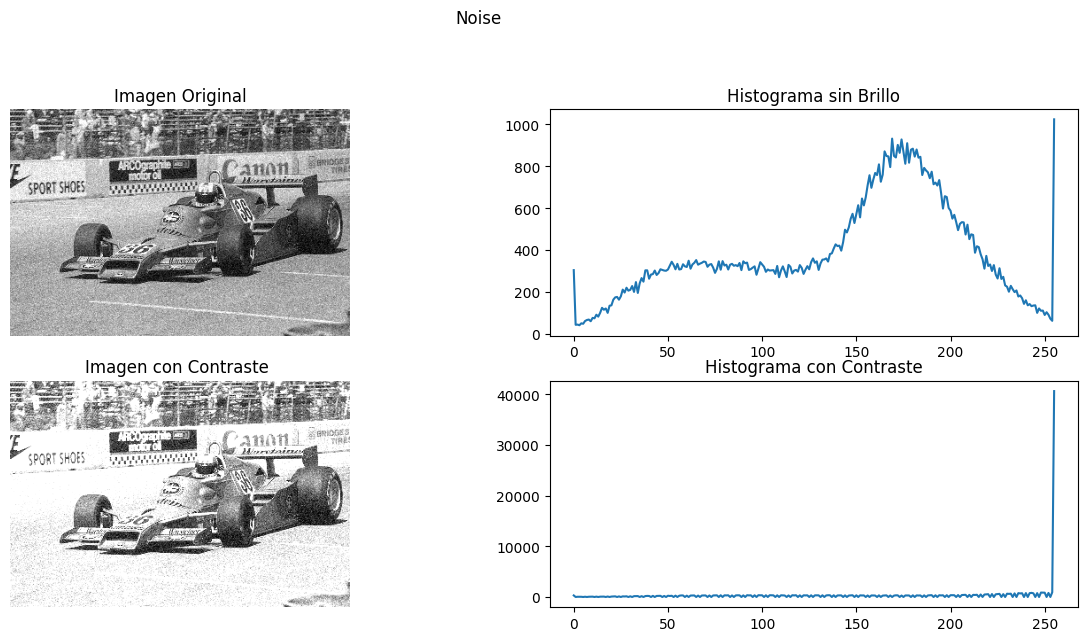

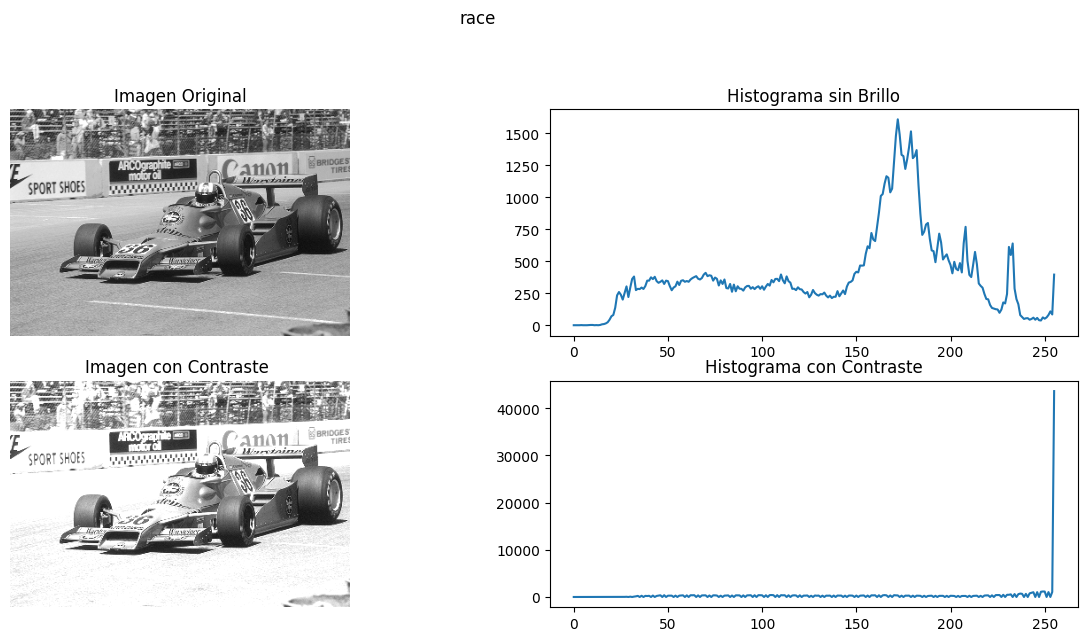

In [37]:
show_img_Contraste(blur,1.5,"Blur")
show_img_Contraste(house,1.5,"House")
show_img_Contraste(noise,1.5,"Noise")
show_img_Contraste(race,1.5,"race")

## 5.	Bajar el contraste en una imagen y mostrar el histograma. Explicar.

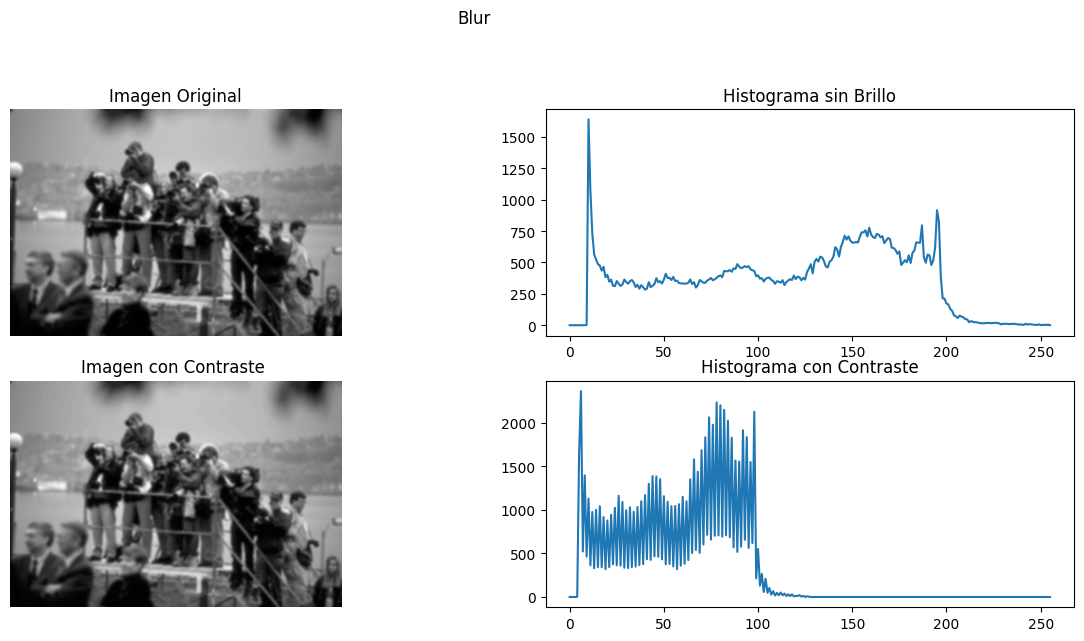

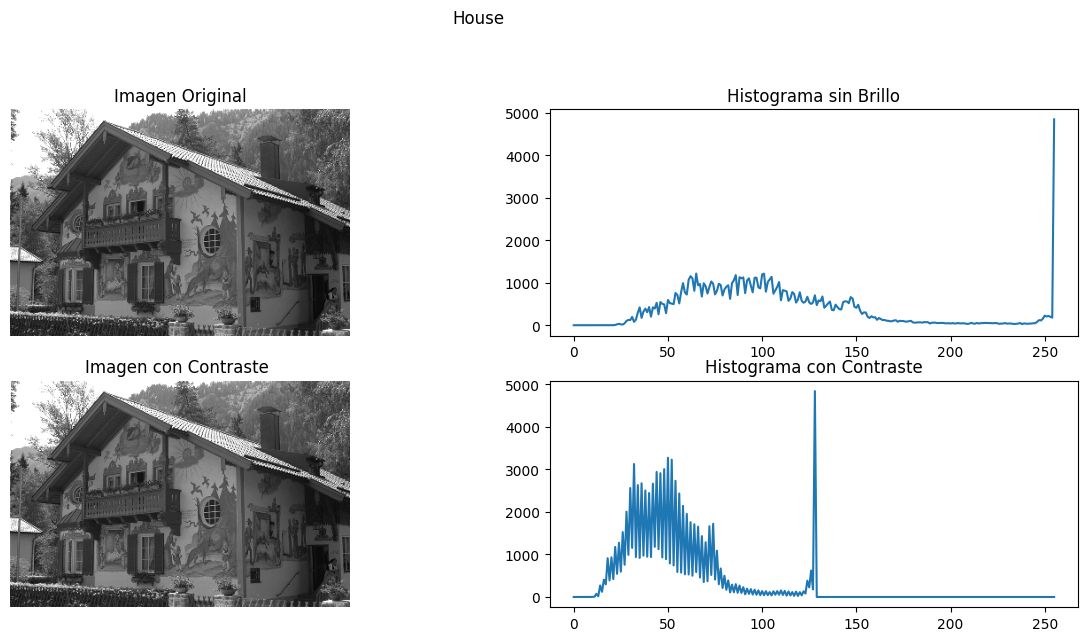

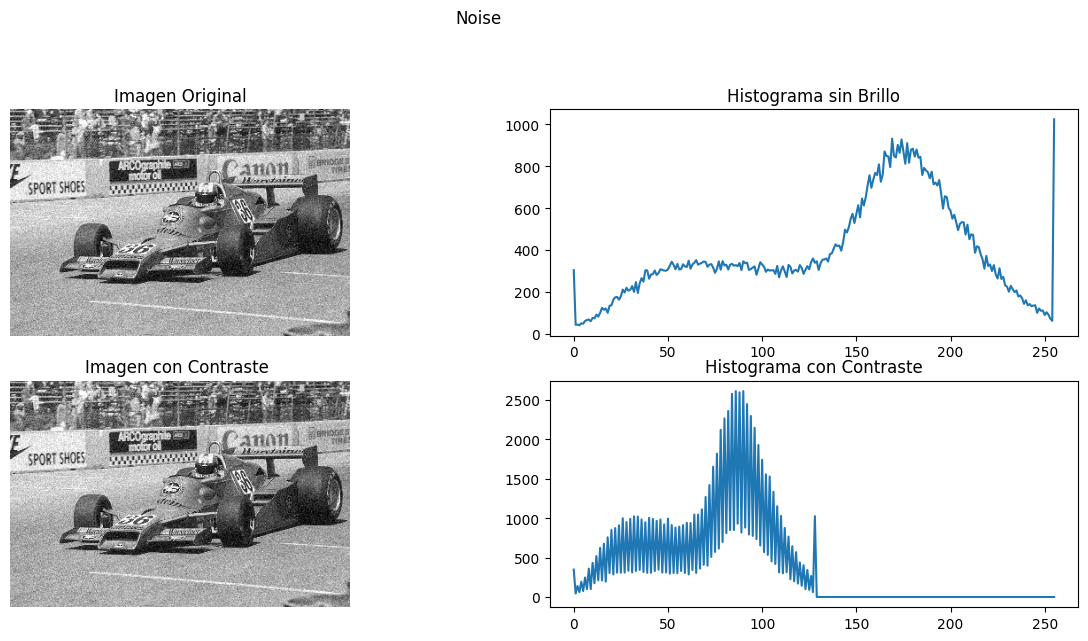

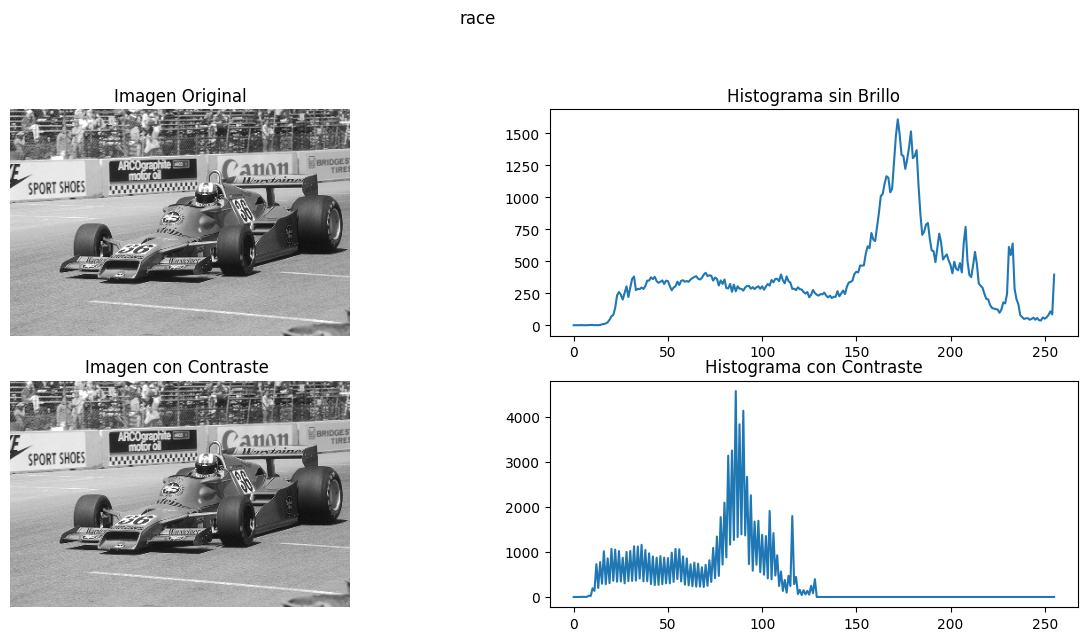

In [36]:
show_img_Contraste(blur,0.5,"Blur")
show_img_Contraste(house,0.5,"House")
show_img_Contraste(noise,0.5,"Noise")
show_img_Contraste(race,0.5,"race")

## 6.	Repetir puntos 4 y 5 para una imagen de color (usar histograma de cada canal en RGB).

In [38]:
def modifica_contraste_por_Canal(imagen, alpha):
    blue, green, red = cv2.split(imagen)
    blue_contraste = cv2.convertScaleAbs(blue, alpha=alpha, beta=0)
    green_contraste = cv2.convertScaleAbs(green, alpha=alpha, beta=0)
    red_contraste= cv2.convertScaleAbs(red ,alpha=alpha, beta=0)
    return blue_contraste, green_contraste, red_contraste

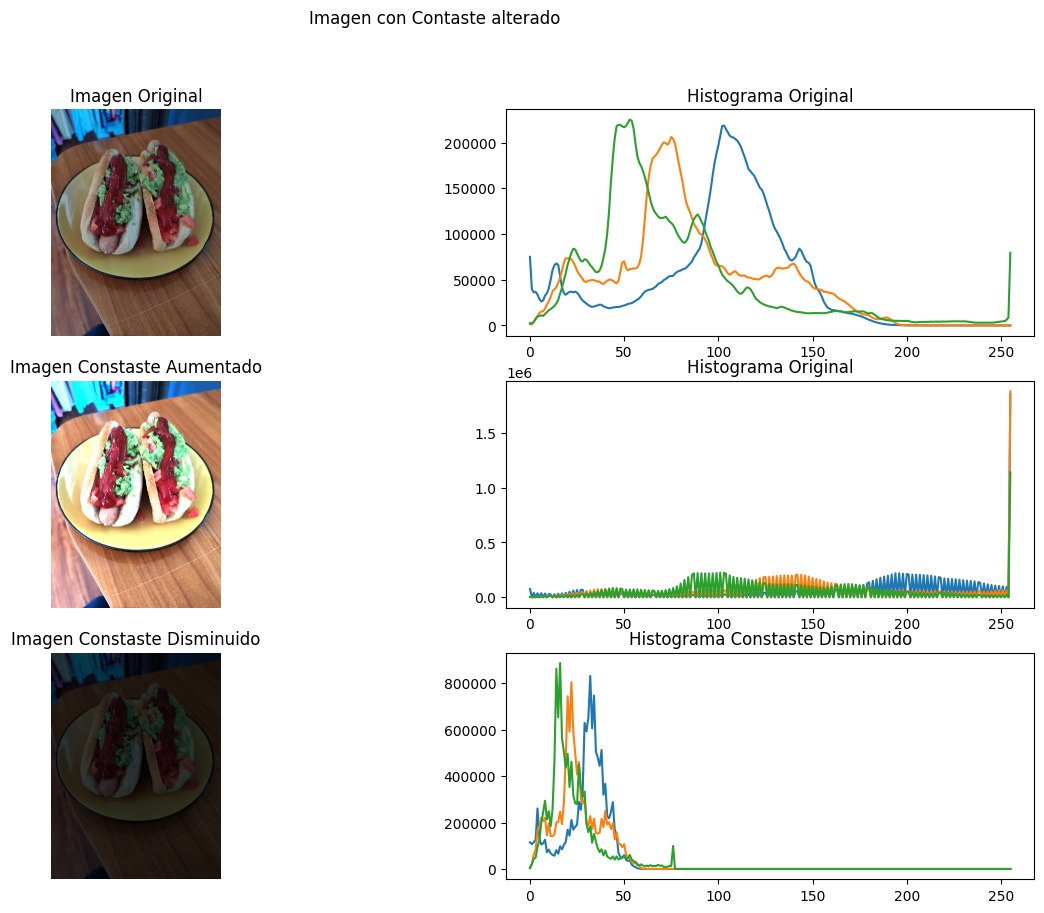

In [41]:
img = cv2.imread("./sim_data-master/images/taller/CompletoSupremo.jpg")
blue, green, red = cv2.split(img)
blue_alto_contaste, green_alto_contaste, red_alto_contaste = modifica_contraste_por_Canal(img, 1.9)
blue_bajo_contaste, green_bajo_contaste, red_bajo_contaste = modifica_contraste_por_Canal(img, 0.3)


hist_blue=cv2.calcHist([blue], [0], None, [256], [0, 256])
hist_green=cv2.calcHist([green], [0], None, [256], [0, 256])
hist_red=cv2.calcHist([red], [0], None, [256], [0, 256])

hist_blue_alto_contaste=cv2.calcHist([blue_alto_contaste], [0], None, [256], [0, 256])
hist_green_alto_contaste=cv2.calcHist([green_alto_contaste], [0], None, [256], [0, 256])
hist_red_alto_contaste=cv2.calcHist([red_alto_contaste], [0], None, [256], [0, 256])

hist_blue_bajo_contaste=cv2.calcHist([blue_bajo_contaste], [0], None, [256], [0, 256])
hist_green_bajo_contaste=cv2.calcHist([green_bajo_contaste], [0], None, [256], [0, 256])
hist_red_bajo_contaste=cv2.calcHist([red_bajo_contaste], [0], None, [256], [0, 256])

plt.figure(figsize=(15, 10))  # Tamaño de la imagen

plt.subplot(3, 2, 1)
plt.imshow(cv2.merge([red, green, blue]))
plt.axis("off")
plt.title('Imagen Original')

plt.subplot(3, 2, 2)
plt.plot(hist_red)
plt.plot(hist_green)
plt.plot(hist_blue)
plt.title('Histograma Original')


plt.subplot(3, 2, 3)
plt.imshow(cv2.merge([red_alto_contaste,green_alto_contaste,blue_alto_contaste]))
plt.axis("off")
plt.title('Imagen Constaste Aumentado')

plt.subplot(3, 2, 4)
plt.plot(hist_red_alto_contaste)
plt.plot(hist_green_alto_contaste)
plt.plot(hist_blue_alto_contaste)
plt.title('Histograma Original')

plt.subplot(3, 2, 5)
plt.imshow(cv2.merge([red_bajo_contaste,green_bajo_contaste,blue_bajo_contaste]))
plt.axis("off")
plt.title('Imagen Constaste Disminuido')

plt.subplot(3, 2, 6)
plt.plot(hist_red_bajo_contaste)
plt.plot(hist_green_bajo_contaste)
plt.plot(hist_blue_bajo_contaste)
plt.title('Histograma Constaste Disminuido')

plt.suptitle("Imagen con Contaste alterado")
plt.show()





